In [ ]:
# imports
from keras.models import load_model
from PIL import Image
import numpy as np

In [ ]:
# load modell and image
model = load_model("cardecoder.h5")
img = Image.open('bild3.jpg')

In [ ]:
# slice image and search for cars 
result = []

step_size = 50
scan_sizes = [800, 600, 400, 200]

for size in scan_sizes:
  for x in range(0, img.size[0] - size, step_size):
    for y in range(0, img.size[1] - size, step_size):
      data = np.asarray(img.crop((x, y, x+size, y+size)).resize((32,32), resample=Image.LANCZOS)).astype(np.float32)/255
   
      pred = np.asarray(model.predict(data.reshape(-1,32,32,3)))
      if(pred > 0.97):
        result.append((x,y,size))

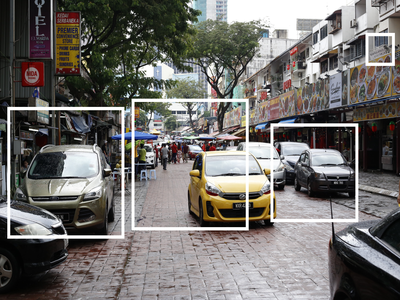

In [ ]:
# draw rectangles around cars
from PIL import ImageDraw

out = img.copy()
draw = ImageDraw.Draw(out)

drawn = []

for cd in result:
  exists = False
  for cd_drawn in drawn:
    if(cd[0] >= cd_drawn[0] and cd[0] <= cd_drawn[0]+cd_drawn[2]):
      if(cd[1]*2 >= cd_drawn[1] and cd[1] <= cd_drawn[1]+cd_drawn[2]):
        exists = True
  if(exists == False):
    draw.rectangle(((cd[0],cd[1]), (cd[0]+cd[2], cd[1]+cd[2])), width=20)
    drawn.append(cd)

out.resize((400,300), resample=Image.LANCZOS)